<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/YuranJang/Pill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import cv2
import glob
import PIL
from PIL import Image
import json
import matplotlib.pyplot as plt

텍스트데이터 가져오기

In [2]:
mother_path = '/content/drive/MyDrive/med_labels'
folder_list = os.listdir(mother_path)
path_list = []
for folder in folder_list:
    path1 = mother_path + "/" + folder
    folder_list2 = os.listdir(path1)
    for folder2 in folder_list2:
      path2 = path1 + '/' + folder2
      path_list.append(path2)

In [3]:
print(type(path_list))
print(path_list[0])

<class 'list'>
/content/drive/MyDrive/med_labels/K-004378-005002-005094-019552_json/K-004378


In [4]:
output_list = []
for path in path_list:
  output = glob.glob(path + '/*.json')
  for i in range(len(output)):
    if output[i] == "":
      continue
    else:
      output_list.append(output[i])

In [5]:
print(output_list[0])

/content/drive/MyDrive/med_labels/K-004378-005002-005094-019552_json/K-004378/K-004378-005002-005094-019552_0_2_0_2_90_000_200.json


In [6]:
print(len(output_list))

5466


In [7]:
example_file = open(output_list[0])
json_file = json.load(example_file)

In [8]:
print(json_file)

{'images': [{'file_name': 'K-004378-005002-005094-019552_0_2_0_2_90_000_200.png', 'width': 976, 'height': 1280, 'imgfile': 'K-004378-005002-005094-019552_0_2_0_2_90_000_200.png', 'drug_N': 'K-004378', 'drug_S': '정상알약', 'back_color': '연회색 배경', 'drug_dir': '앞면', 'light_color': '주백색', 'camera_la': 90, 'camera_lo': 0, 'size': 200, 'dl_idx': '4377', 'dl_mapping_code': 'K-004378', 'dl_name': '타이레놀정500mg', 'dl_name_en': 'Tylenol Tab. 500mg', 'img_key': 'http://connectdi.com/design/img/drug/147427630838400132.jpg', 'dl_material': '아세트아미노펜', 'dl_material_en': 'Acetaminophen', 'dl_custom_shape': '정제, 저작정', 'dl_company': '(주)한국얀센', 'dl_company_en': 'Janssen Korea', 'di_company_mf': '', 'di_company_mf_en': '', 'item_seq': 199303108, 'di_item_permit_date': '20010404', 'di_class_no': '[01140]해열.진통.소염제', 'di_etc_otc_code': '일반의약품', 'di_edi_code': '646900720', 'chart': '백색의 장방형 필름코팅정제', 'drug_shape': '장방형', 'thick': 6.5, 'leng_long': 17.5, 'leng_short': 7.2, 'print_front': 'TYLENOL', 'print_back': '50

In [9]:
json_file.get('images')

[{'file_name': 'K-004378-005002-005094-019552_0_2_0_2_90_000_200.png',
  'width': 976,
  'height': 1280,
  'imgfile': 'K-004378-005002-005094-019552_0_2_0_2_90_000_200.png',
  'drug_N': 'K-004378',
  'drug_S': '정상알약',
  'back_color': '연회색 배경',
  'drug_dir': '앞면',
  'light_color': '주백색',
  'camera_la': 90,
  'camera_lo': 0,
  'size': 200,
  'dl_idx': '4377',
  'dl_mapping_code': 'K-004378',
  'dl_name': '타이레놀정500mg',
  'dl_name_en': 'Tylenol Tab. 500mg',
  'img_key': 'http://connectdi.com/design/img/drug/147427630838400132.jpg',
  'dl_material': '아세트아미노펜',
  'dl_material_en': 'Acetaminophen',
  'dl_custom_shape': '정제, 저작정',
  'dl_company': '(주)한국얀센',
  'dl_company_en': 'Janssen Korea',
  'di_company_mf': '',
  'di_company_mf_en': '',
  'item_seq': 199303108,
  'di_item_permit_date': '20010404',
  'di_class_no': '[01140]해열.진통.소염제',
  'di_etc_otc_code': '일반의약품',
  'di_edi_code': '646900720',
  'chart': '백색의 장방형 필름코팅정제',
  'drug_shape': '장방형',
  'thick': 6.5,
  'leng_long': 17.5,
  'leng_s

In [10]:
var1 = json_file.get('annotations')
print(var1)

[{'area': 96180, 'iscrowd': 0, 'bbox': [595, 700, 210, 458], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'id': 1, 'image_id': 1}]


In [11]:
var2 = var1[0]
print(var2['bbox'])

[595, 700, 210, 458]


In [12]:
po = var2['bbox']
print(tuple(po))
point = tuple(po)

(595, 700, 210, 458)


json파일은 각 한 알에 대한 것. 어떻게 png와 조합?

이미지데이터 가져오기

In [13]:
#%cd /content/drive/MyDrive
#! unzip -qq "/content/drive/MyDrive/med_images.zip"

In [14]:
img_dir_path = '/content/drive/MyDrive/med_images'
img_path_list = glob.glob(img_dir_path + '/*/*.png')

In [15]:
print(len(img_path_list))

2000


In [16]:
print(img_path_list[0])

/content/drive/MyDrive/med_images/K-005000-019232-020238/K-005000-019232-020238_0_2_0_2_75_000_200.png


이미지 크롭하기

In [17]:
ex_img_path = img_path_list[0] 

In [18]:
with Image.open(ex_img_path) as im:
    # 크롭 영역 (좌측 상단 x, 좌측 상단 y, 우측 하단 x, 우측 하단 y)
    # 위 json과 다른 데이터이므로 임의지정
    crop_region = (595, 700, 805, 1000)
    # 크롭하기
    cropped_im = im.crop(crop_region)

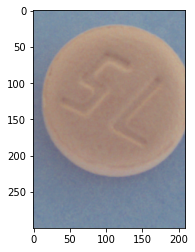

In [19]:
# 이미지 보이기
plt.imshow(cropped_im)
plt.show()

약 한 알씩 크롭 + 약 이름 데이터와 매치

In [20]:
exp1 = img_path_list[0].split('/')[-1]
print(exp1)

K-005000-019232-020238_0_2_0_2_75_000_200.png


In [24]:
a2 = exp1.index('_')
print(a2)
exp1 = exp1[:22]
print(exp1)

22
K-005000-019232-020238


In [25]:
exp2 = exp1.split('-')
print(exp2)

['K', '005000', '019232', '020238']


json파일 : med_label/약조합/개별약/약조합중 해당 약(각도별) 설명

이미지파일 : med_images/약조합/약조합사진